In this project I generated data for 2 different cases:


Case 1: 200 points inside a circle with a center of (1.5,0), and radius between 4-9, and 200 points inside a circle with a center of (1.5,0), and radius between 0-6


Case 2: 200 points inside a circle with a center of (1.5,0), and radius between 2-6, and 100 points with the mean of (1,0) for (X,Y), generated randomly with the standard deviation of 1.

For the first set, I define a function to plot random points of the first set, by using geometric relations of sin and cos for implementing the circular areas:

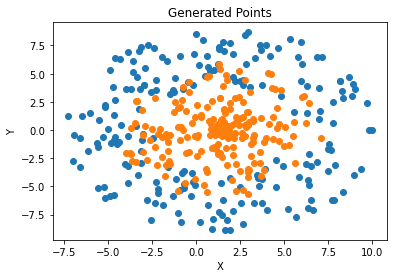

In [42]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def random_points (radius1,radius2,x_center,y_center,n):
    x_positions = []
    y_positions = []
    for i in range(n):
        theta = random.uniform(0,2*math.pi)
        radius = random.uniform(radius1,radius2)
        x = x_center + (radius * math.cos(theta))
        y = y_center + (radius * math.sin(theta))
        x_positions.append(x)
        y_positions.append(y)
    return x_positions,y_positions


x_1_1,y_1_1 = random_points (4,9,1.5,0,200)
x_1_2,y_1_2 = random_points (0,6,1.5,0,200)
plt.scatter(x_1_1,y_1_1);
plt.scatter(x_1_2,y_1_2);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Points")
plt.show()


I plot the second set of dots by using the same function, and getting random points for normal distributions:

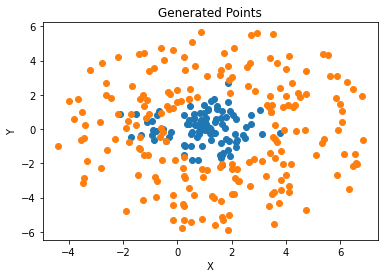

In [43]:
x_2_2,y_2_2 = random_points (2,6,1.5,0,200)
x_2_1 = np.random.normal(loc=1.0, scale=1.0, size=100)
y_2_1 = np.random.normal(loc=0.0, scale=1.0, size=100)
plt.scatter(x_2_1,y_2_1);
plt.scatter(x_2_2,y_2_2);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Points")
plt.show()

I put the data in 2 lists for each of the parts:

In [44]:
data_set1 = np.ones((200,2))
for i in range(200):
    data_set1[i][0] = x_1_1[i]
    data_set1[i][1] = y_1_1[i]

data_set2 = np.ones((200,2))
for i in range(200):
    data_set2[i][0] = x_1_2[i]
    data_set2[i][1] = y_1_2[i]

data_set3 = np.ones((100,2))
for i in range(100):
    data_set3[i][0] = x_2_1[i]
    data_set3[i][1] = y_2_1[i]

data_set4 = np.ones((200,2))
for i in range(200):
    data_set4[i][0] = x_2_2[i]
    data_set4[i][1] = y_2_2[i]

I split the data into train and test data:

In [45]:
samples_1 = np.ones((400,2))
for i in range(200):
    samples_1[i] = data_set1[i]
for i in range(200,400):
    samples_1[i] = data_set1[i-200]
    
random.shuffle(samples_1)
train_data_1 = samples_1[:320]
test_data_1 = samples_1[320:]

samples_2 = np.ones((400,2))
for i in range(100):
    samples_2[i] = data_set2[i]
for i in range(100,300):
    samples_2[i] = data_set1[i-200]

random.shuffle(samples_2)
train_data_2 = samples_2[:320]
test_data_2 = samples_2[320:]

I use the same functions implemented in the previous part for calculating w:

In [46]:
def sigmoid(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid
    
def w_calc(train_data,class_1,class_2):
    yi=[]
    for i in range (len(train_data)):
        if(train_data[i] in class_1):
            yi.append(1)
        else:
            yi.append(0)

    eta = 0.00000001 
    n_iterations = 200

    xi = np.ones((1,2))
    w = np.random.randn(2,1)
    w_transpose = w.transpose()



    x = np.ones((1,2))
    for j in range(n_iterations):
        gradients = 0
        for i in range(len(train_data)):
            xi = train_data[i]
            xi = np.reshape(xi,(len(xi),1))
            multiplication = np.dot(w_transpose,xi)
            gradients+=xi * (yi[i]-sigmoid(multiplication))
        w = w + (eta * gradients)
    
    return w

I use the classifying function below to estimate the class, and then define the 2x2 **confusion matrix** as below:

In [47]:
def classifier(train_data, test_data, class_1,class_2):
    w = w_calc (train_data,class_1,class_2)
    w = np.reshape(w,(1,2))
    for i in range(len(test_data)):
        x = test_data[i]
        x = np.reshape(x,(len(x),1))
        p = sigmoid(np.dot(w,x))

    T1=F2=F1=T2=0
    for i in range(len(test_data)):
        if(test_data[i] in class_1 and p>0.5):
            T1+=1
        elif(test_data[i] in class_2 and p<0.5):
            T2+=1
        elif(test_data[i] in class_1 and p<0.5):
            F1+=1
        else:
            F2+=1
    return ((T1+T2)/(T1+T2+F1+F2))

The accuracy as follows:

In [53]:
accuracy_dataset1 = classifier(train_data_1, test_data_1, data_set1,data_set2)
accuracy_dataset2 = classifier(train_data_2, test_data_2, data_set3,data_set4)


Since the accuracy is low, I use the following functions to change the dimensions from 2 to 35:

In [49]:
def x_dim_35(xi):
    xi = np.reshape(xi,(2,1))
    x1 = xi[0][0]
    x2 = xi[1][0]
    x = []
    for j in range(1,8):
        for k in range(j+1):
            x.append((x1**(j-k) * x2**(k)))
    x = np.reshape(x,(35,1))
    return x

In [50]:
def w_dim35(train_data,class_1,class_2):

    yi=[]
    for i in range(len(train_data)):
        if(train_data[i] in class_1):
            yi.append(1)
        else:
            yi.append(0)

    eta = 0.000000000001 
    n_iterations = 300

    xi = np.ones((1,2))
    w = np.random.randn(35,1)
    w_transpose = w.transpose()
    x = []

    for j in range(n_iterations):
        gradients = 0
        for i in range(len(train_data)):
            xi = train_data[i]
            x = x_dim_35 (xi)
            multiplication = np.dot(w_transpose,x)
            gradients+=(x * yi[i]-sigmoid(multiplication))
        w = w + (eta * gradients)
        
    return w

I define the new classifier by using the 35-dim data features, and calculating the new confusion matrix:

In [51]:
def new_classifier(train_data, test_data, class_1,class_2):
    w = w_dim35 (train_data,class_1,class_2)
    w = np.reshape(w,(1,len(w)))
    
    for i in range(len(test_data)):
        xi = test_data[i]
        x = x_dim_35 (xi)
        p = sigmoid(np.dot(w,x))

    T1=F2=F1=T2=0
    for i in range(len(test_data)):
        if(test_data[i] in class_1 and p>0.5):
            T1+=1
        elif(test_data[i] in class_2 and p<0.5):
            T2+=1
        elif(test_data[i] in class_1 and p<0.5):
            F1+=1
        else:
            F2+=1
    return ((T1+T2)/(T1+T2+F1+F2))

by calculating the new accuracy we would see it increases:

In [ ]:
new_accuracy_dataset1 = new_classifier(train_data_1, test_data_1, data_set1,data_set2)
new_accuracy_dataset2 = new_classifier(train_data_2, test_data_2, data_set3,data_set4)